# Importing the libararies

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For data cleaning and creating word embeddings
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import pycountry

# Loading the data
df = pd.read_excel('Data.xlsx')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\YUVRAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Exploratory data analysis

In [2]:
# Checking the shape of the dataframe
df.shape

(43996, 2)

In [3]:
# Checking first 5 rows of the dataframe
df.head(5)

,title,target
0,"Inside Ciara's Year of ""Life and Love"": Russel...",1
1,Prince Harry and Meghan Markle Relationship Ti...,1
2,Cate Blanchett & Andrew Upton are fine… after ...,0
3,Palestinian Factions Demand ‘Day of Rage’ Duri...,0
4,Denis O’Brien Announces Bid For Irish Presidency,1


In [4]:
# Let's check the datatype of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43996 entries, 0 to 43995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   43438 non-null  object
 1   target  43996 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 687.6+ KB


In [5]:
# Chaning the dataytpe of target feature from int64 to int32
df['target'] = df['target'].astype(np.int32)

In [6]:
# Checking any null values
df.isnull().mean()*100

title     1.268297
target    0.000000
dtype: float64

In [7]:
# Checking any duplicated values
df.duplicated().sum()

2345

<AxesSubplot:ylabel='target'>

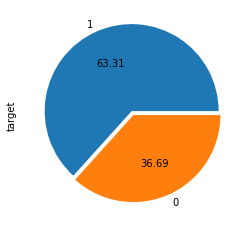

In [8]:
# Let's check distribution of data across both classes in the target variable
ex = (0.05, 0)
df['target'].value_counts().plot(kind='pie',autopct='%.2f',explode= ex)

# Data cleaning

- Lowercasing
- Punctuation removal
- Stop word removal
- Spelling check
- Stemming/lemmatization

In [9]:
# Let's remove duplicated values form the dataframe
df.drop_duplicates(inplace=True)

# Removing the missing titles
df.dropna(inplace=True)

In [11]:
# let's crete an object of WordNetLemmatizer class for doing lemmatization
lemm = WordNetLemmatizer()

# Empty list to store the clean title
cleaned_data = []
for i in df['title']:
    cleaned_title = re.sub('[^a-zA-Z]',' ',str(i)) # Removal of punctuations
    cleaned_title = cleaned_title.split() # Tokenization
    
    # create a set of country names using the pycountry library
    countries = set([country.name.lower() for country in pycountry.countries])
    
    cleaned_title = [word.lower() if word.lower() not in countries else word for word in cleaned_title] # lowering the words except country names
    
    # Stopword removal and lemmatizatoin
    cleaned_title = [lemm.lemmatize(word) for word in cleaned_title if not word in stopwords.words('english')]
    cleaned_title = ' '.join(cleaned_title)
    cleaned_data.append(cleaned_title)

In [12]:
cleaned_data

['inside ciara year life love russell wilson daddy skill kid awesome bond',
 'prince harry meghan markle relationship timeline',
 'cate blanchett andrew upton fine got friendly year old',
 'palestinian faction demand day rage trump trip Israel',
 'denis brien announces bid irish presidency',
 'fewer tomato ketchup east european pursue parity grocery new york time',
 'serena williams inspires reddit co founder husband career tech say marriage front row seat greatness',
 'cut hair bob inspired lucy hale long bob',
 'wag atlanta',
 'ncaa big keep watchful eye texas bathroom bill breitbart',
 'summer thigh high slit',
 'federal government overreach ahead',
 'report ann coulter cancel uc berkeley speech breitbart',
 'camila cabello wear couture hang hotel room artful never video',
 'snow report around northland duluth saturday',
 'kim kardashian say would feel safe paris following robbery',
 'casey affleck get car accident brings cop helped jimmy kimmel live',
 'chloe bennet spotted kissing

In [ ]:


# define the input text
text = "I live in the United States and work for a company in the United Kingdom"

# split the text into words
words = text.split()



# lowercase each word in the text that is not a country name
processed_words = [word.lower() if word.lower() not in countries else word for word in words]

# join the words back into a string
processed_text = " ".join(processed_words)

print(processed_text)


In [47]:
# Let's now format the data for the Word2Vec Model
text = []
for sent in clean_content_data:
    text.append(simple_preprocess(sent))

In [49]:
# create a Word2Vec model and build the vocabulary
model = Word2Vec(window=5, min_count=1, workers=4)
model.build_vocab(text)

In [50]:
model.train(text, total_examples=model.corpus_count, epochs=model.epochs)

(749896, 863765)

In [53]:
model.wv['kill']

array([-0.5978057 ,  0.7654225 ,  0.27449977, -0.0493149 ,  0.06600569,
       -0.9560665 ,  0.01658279,  1.2739098 , -0.26521778, -0.01366001,
       -0.01887236, -0.85981417, -0.5955587 ,  0.5037331 ,  0.2072784 ,
       -0.3302306 ,  0.11957528, -0.56994045,  0.45421833, -1.3062454 ,
        0.35273933,  0.39132136,  0.70832664,  0.20614249, -0.43943697,
        0.09938884, -0.29136974, -0.4300372 , -0.40650648, -0.25633052,
        0.87475306, -0.2613419 ,  0.10108645, -0.63749194,  0.09237894,
        0.61190724,  0.17657179, -0.36631694, -0.5013904 , -1.1993389 ,
        0.17083725, -0.47779426, -0.3096284 ,  0.01850321,  0.70451593,
       -0.42156225, -0.56054413, -0.17673534,  0.4170002 ,  0.3176633 ,
        0.3474704 , -0.9812612 , -0.30736923,  0.01141683, -0.6050946 ,
        0.43273437,  0.26391163, -0.06812064, -0.3622407 ,  0.49403897,
        0.19997129, -0.07620778,  0.32085976,  0.15254167, -0.6433459 ,
        0.22653307, -0.04723367,  0.5344266 , -0.6938789 ,  0.43